# 0. Install and Import dependencies

In [7]:
!pip install finta

In [10]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from finta import TA

# 1. Load BTCUSD Data 
https://www.coingecko.com/it/monete/bitcoin/historical_data?start=2025-01-01&end=2025-05-26
https://www.marketwatch.com/investing/cryptocurrency/btcusd/download-data?mod=mw_quote_ta


In [2]:
# Load DataFrame
df = pd.read_csv('data/BTCUSD.csv')

# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Apply numeric conversion to the columns
colonne_prezzo_lower = ['Open', 'High', 'Low', 'Close'] # Volume will be handled if it's already numeric

for colonna in colonne_prezzo_lower:
    if colonna in df.columns:
        print(f"Processing column: {colonna}...")
        if df[colonna].dtype == 'object': # Apply only if it's a string
            df[colonna] = df[colonna].astype(str).str.replace(',', '', regex=False)
        df[colonna] = pd.to_numeric(df[colonna], errors='coerce')
    else:
        print(f"Attention: column '{colonna}' is not present in the DataFrame.")

print("First rows of the DataFrame after renaming and conversion:")
print(df.head())

Processing column: Open...
Processing column: High...
Processing column: Low...
Processing column: Close...
First rows of the DataFrame after renaming and conversion:
        Date   Open   High    Low  Close        Volume
0 2022-06-01  31624  31948  29881  30104  2.977057e+10
1 2022-06-02  30102  30362  29329  30275  3.555333e+10
2 2022-06-03  30275  30659  29255  29552  2.423240e+10
3 2022-06-04  29552  29941  29466  29634  2.199786e+10
4 2022-06-05  29634  30138  29528  30035  1.291138e+10


In [3]:
# Rename columns to lowercase
df.rename(columns={
    'Date': 'date',     # gym-trading-env doesn't use 'date' as an index by default, but handles it
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)

## 1.1 Add Custom Indicators

In [4]:
# Calculate indicators
df['sma'] = TA.SMA(df, period=12)  # Short-term SMA
df['rsi'] = TA.RSI(df, period=14) # / 100.0  # Normalize RSI to [0, 1]

# Long-Term Indicators:
df['sma_200'] = TA.SMA(df, period=200)
df['distance_from_sma_200'] = (df['close'] - df['sma_200']) / df['sma_200']

df['daily_return'] = df['close'].pct_change()
df['volatility_100'] = df['daily_return'].rolling(window=100).std()

df['min_200'] = df['close'].rolling(window=200).min()
df['max_200'] = df['close'].rolling(window=200).max()
df['position_in_200_range'] = (df['close'] - df['min_200']) / (df['max_200'] - df['min_200'])

# Drop intermediate columns not needed in final dataset
df.drop(columns=['daily_return', 'min_200', 'max_200'], inplace=True)

# Fill any remaining NaNs
df.fillna(0, inplace=True)

# Slice to remove warm-up period rows (safely remove first 200 rows for longest rolling calc)
df_processed = df.iloc[200:].copy()

# Optional: reset index if needed
df_processed.reset_index(drop=True, inplace=True)

# Display result
print(df_processed.head(15))

         date   open   high    low  close        volume           sma  \
0  2022-12-18  16706  16798  16669  16760  1.508638e+10  17151.083333   
1  2022-12-19  16760  16832  16531  16595  1.113405e+10  17131.833333   
2  2022-12-20  16595  17046  16288  16862  1.771967e+10  17103.833333   
3  2022-12-21  16861  16924  16738  16780  2.493822e+10  17077.083333   
4  2022-12-22  16780  16863  16566  16781  1.606277e+10  17044.416667   
5  2022-12-23  16780  16917  16764  16804  1.784783e+10  17019.333333   
6  2022-12-24  16804  16854  16763  16842  1.676539e+10  16996.083333   
7  2022-12-25  16842  16851  16734  16768  1.016985e+10  16914.083333   
8  2022-12-26  16768  16912  16766  16839  1.257445e+10  16836.083333   
9  2022-12-27  16839  16962  16601  16655  1.257500e+10  16772.416667   
10 2022-12-28  16655  16772  16560  16589  1.743606e+10  16748.416667   
11 2022-12-29  16588  16650  16468  16596  1.911361e+10  16739.250000   
12 2022-12-30  16595  16643  16353  16561  1.568373

In [5]:
# To save the processed DataFrame:
df_processed.to_csv('data/BTCUSD_processed.csv', index=False)
print("\nProcessed data saved to 'BTCUSD_processed.csv'")


Processed data saved to 'BTCUSD_processed.csv'


# 2. Plotting the Dataframe

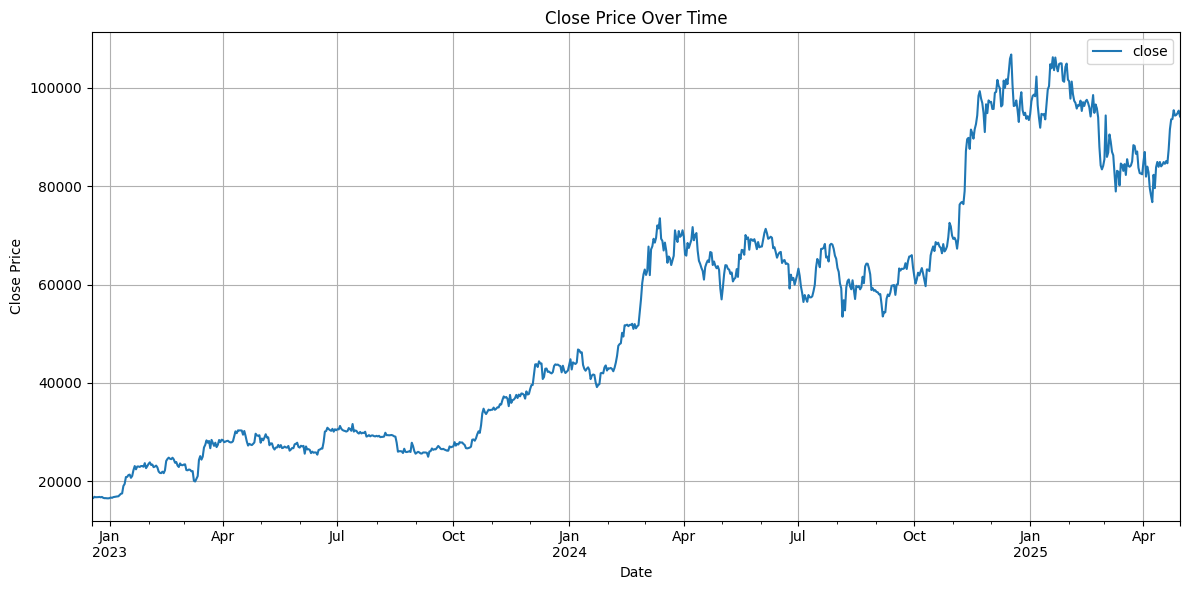

In [6]:
# Plotting the 'close' price against 'date'
df_processed.plot(x='date', y='close', figsize=(12, 6))
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

# 3. Loading and Plotting ETH Data

In [11]:
# Load DataFrame
df_eth = pd.read_csv('data/ETHUSD_processed.csv')

# Display result
print(df_eth.head)

<bound method NDFrame.head of                     date     open     high      low    close        volume  \
0    2023-01-05 00:00:00  1252.16  1259.05  1242.08  1251.32  6.727208e+09   
1    2023-01-06 00:00:00  1251.44  1275.10  1237.18  1266.32  4.052352e+09   
2    2023-01-07 00:00:00  1266.31  1271.18  1261.49  1264.20  5.222707e+09   
3    2023-01-08 00:00:00  1264.20  1275.72  1258.12  1269.72  2.439389e+09   
4    2023-01-09 00:00:00  1269.71  1343.85  1269.00  1317.74  3.401918e+09   
..                   ...      ...      ...      ...      ...           ...   
842  2025-04-26 00:00:00  1800.42  1836.18  1780.10  1807.26  1.565675e+10   
843  2025-04-27 00:00:00  1806.32  1854.25  1787.05  1803.78  1.029361e+10   
844  2025-04-28 00:00:00  1803.20  1823.96  1747.58  1786.67  9.632458e+09   
845  2025-04-29 00:00:00  1786.54  1842.00  1781.80  1810.01  1.677738e+10   
846  2025-04-30 00:00:00  1809.50  1816.55  1737.76  1794.50  1.399456e+10   

             sma        rsi     s

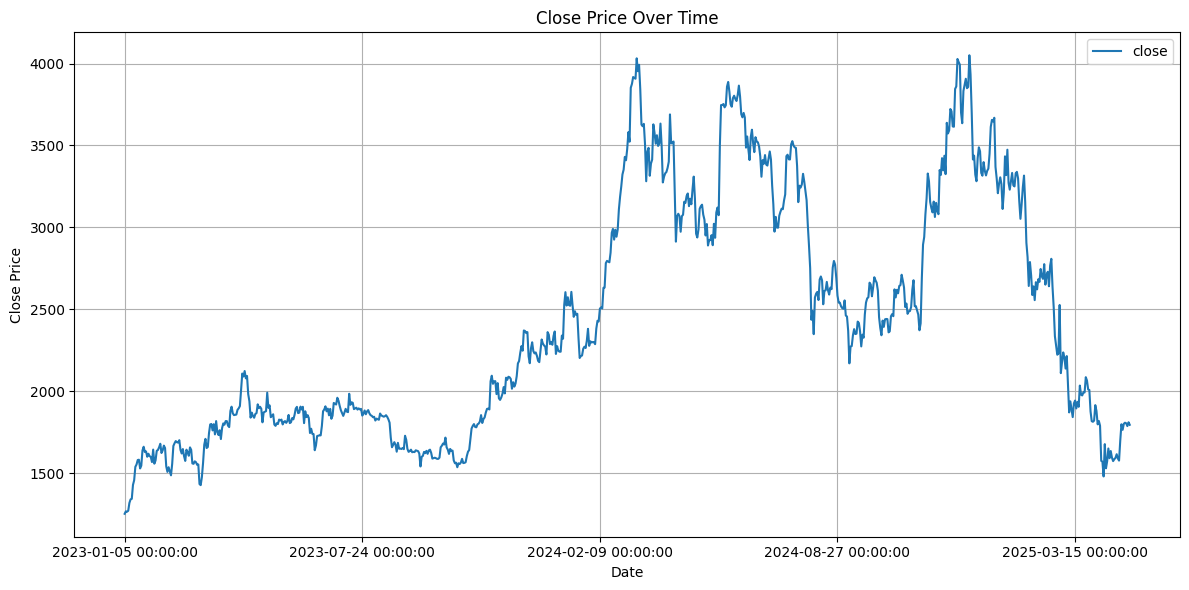

In [14]:
# Plotting the 'close' price against 'date'
df_eth.plot(x='date', y='close', figsize=(12, 6))
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

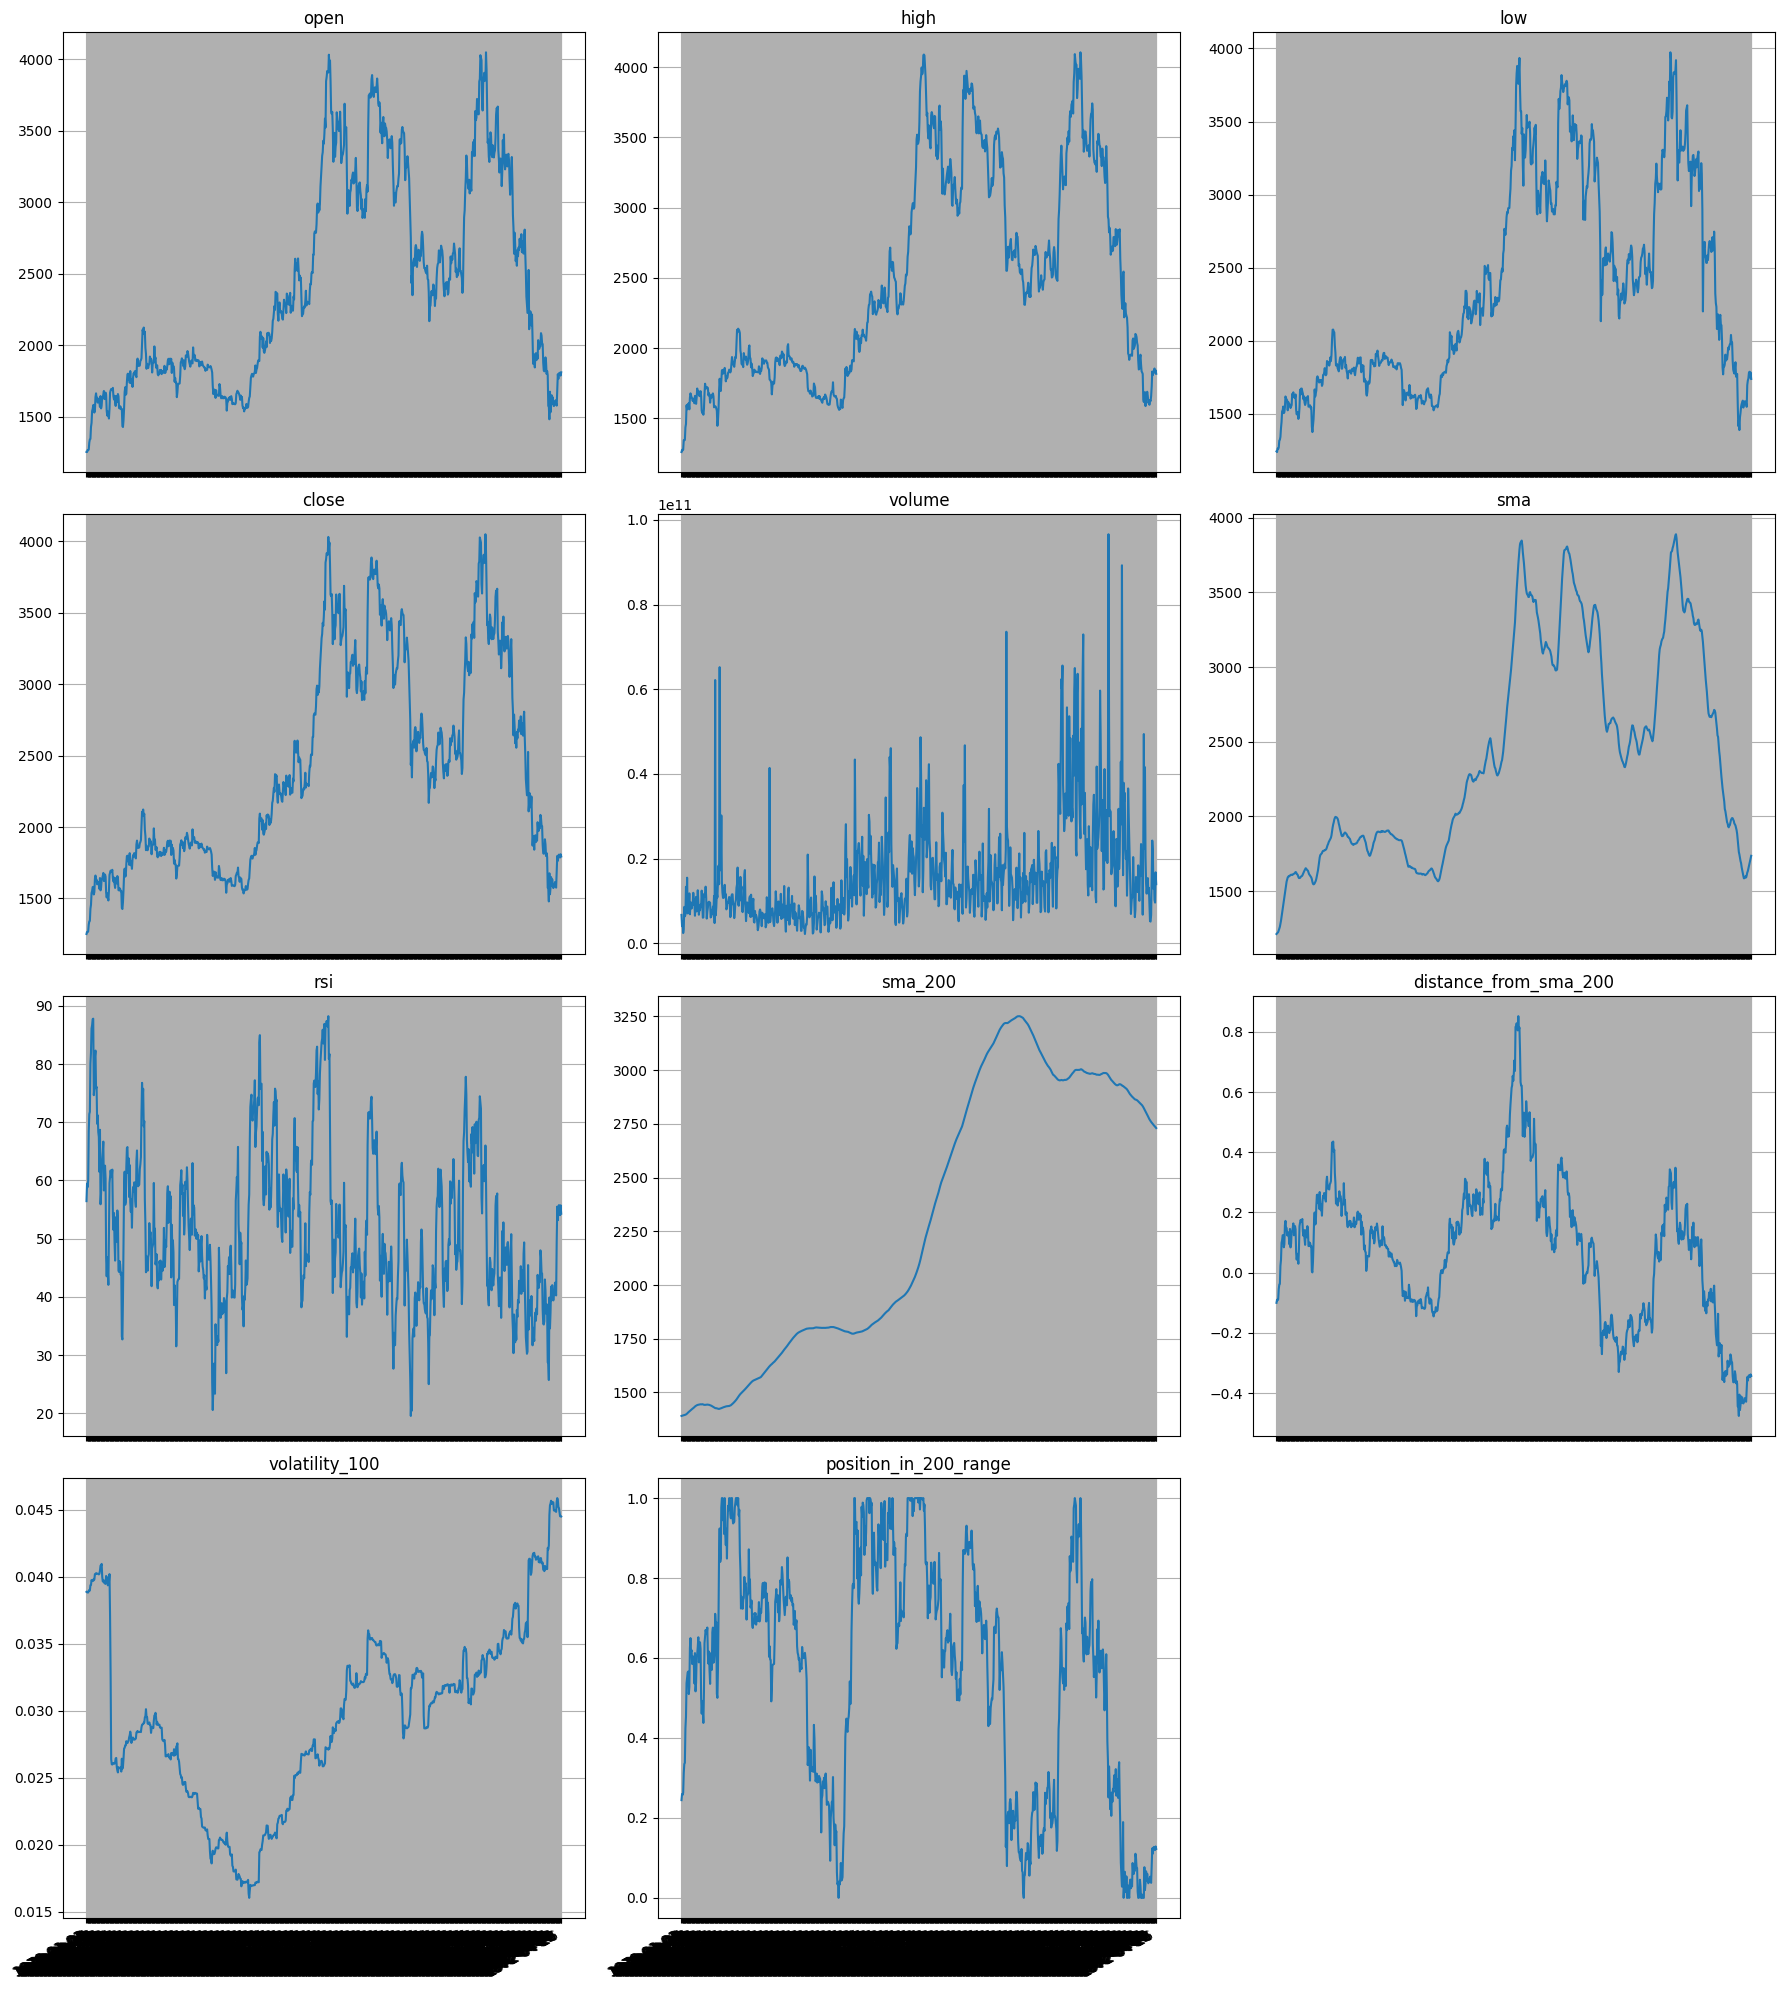

In [16]:
import matplotlib.pyplot as plt
import math

# Select only numeric columns (excluding date)
features = df_eth.select_dtypes(include='number').columns.tolist()

# Determine grid size
n_features = len(features)
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), sharex=True)
axes = axes.flatten()  # Flatten in case of single row

# Plot each feature
for i, col in enumerate(features):
    axes[i].plot(df_eth['date'], df_eth[col])
    axes[i].set_title(col)
    axes[i].grid(True)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Improve layout
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()
